In [7]:
import json
import matplotlib.pyplot as plt
import itertools
import random
from scipy.interpolate import *
from mpl_toolkits.mplot3d import axes3d
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

with open(r"C:\Users\richa\Desktop\Univecity projects\MDM3 B\mojo_sperm_tracking_data_bristol\tp49\cover0_0_YOLO_NO_TRACKING_output\centroids_with_meta.json", "r") as read_file:
    data = json.load(read_file)

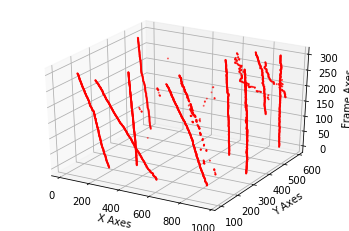

In [6]:
x_values = []
y_values = []
frame_values=[]
#Plotting all positions of center of sperm heads for video 0
for i in range(0,len(data["centroids"])): # number of frames
    for j in range(0,len(data["centroids"][i])): #number of sperms in frame
        x_values.append(data["centroids"][i][j]["center"][0])
        y_values.append(data["centroids"][i][j]["center"][1])
        frame_values.append(i)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(x_values,y_values,frame_values,color='r',s=1)
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')

plt.show()

In [3]:
X = []
for i in range(0,len(x_values)):
    X.append([x_values[i],y_values[i],frame_values[i]])


# Does the DBSCAN
X = np.asarray(X)
dbscan = DBSCAN(eps=15, min_samples=15)
model = dbscan.fit(X)
labels = model.labels_

# How many clusters?
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
print(n_clusters)
print(labels)


17
[ 0  8  1 ... 12 10 14]


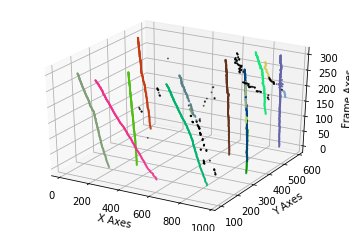

In [4]:
fig = plt.figure
ax = plt.axes(projection="3d")
lists_cluster = []
for x in range(n_clusters):
    cluster_A = []
    for i in range(0, len(labels)):
        if labels[i] == x-1:  # this is the noice data
            cluster_A.append([x_values[i], y_values[i], frame_values[i]])
    cluster_A = np.asarray(cluster_A)
    lists_cluster.append(cluster_A)
    r = lambda: random.randint(0,25)
    random_color = '#%02X%02X%02X' % (r()*10,r()*10,r()*10)
    if x == 0: #The noise data print as black dots
        random_color ='black'
    ax.scatter(cluster_A[:,0], cluster_A[:,1], cluster_A[:,2],color=random_color,s=1)

        
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')
plt.show()

In [8]:
# creats all the token sperms for all o the sperms that have not 
token_sperms = []
for i in range(1, len(lists_cluster)):
    if len(lists_cluster[i]) <= 300:
        x = lists_cluster[i][:,0]
        y = lists_cluster[i][:,1]
        z = lists_cluster[i][:,2]
        p1_x = np.polyfit(z,x,2)
        p1_y = np.polyfit(z,y,2)
        z_t = np.array(range(301))
        x_t = p1_x[2] + p1_x[1]*(z_t) + p1_x[0]*(z_t)**2 # + p1_x[0]*(z_t)**3 
        y_t = p1_y[2] + p1_y[1]*(z_t) + p1_y[0]*(z_t)**2 # + p1_y[0]*(z_t)**3
        for t in range(0,len(z_t)):
            token_sperms.append([x_t[t],y_t[t],z_t[t]])
        

In [9]:
X = []
for i in range(0,len(x_values)):
    X.append([x_values[i],y_values[i],frame_values[i]])

# this are the extra sperms "token sperms"
for t in range(0,len(token_sperms)):
    X.append([token_sperms[t][0],token_sperms[t][1],token_sperms[t][2]])


# Does the DBSCAN with the token sperms
X = np.asarray(X)
dbscan = DBSCAN(eps=10, min_samples=10)
model = dbscan.fit(X)
labels = model.labels_

# How many clusters?
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
print(n_clusters)
print(len(labels))


16
5666


<IPython.core.display.Javascript object>


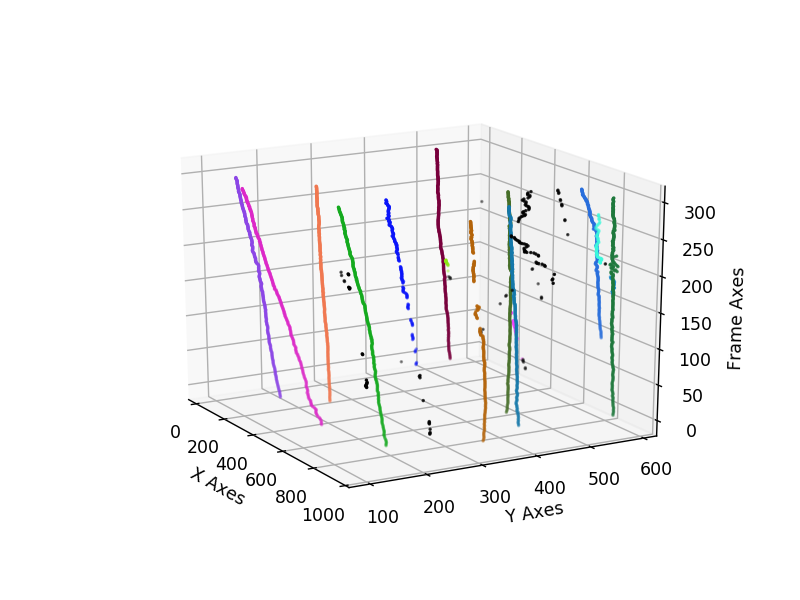

In [18]:
%matplotlib notebook
%matplotlib widget
fig = plt.figure
ax = plt.axes(projection="3d")
lists_cluster = []
for x in range(n_clusters):
    cluster_A = []
    for i in range(0, len(x_values)):
        if labels[i] == x-1:  # this is the noice data
            cluster_A.append([x_values[i], y_values[i], frame_values[i]])
    cluster_A = np.asarray(cluster_A)
    lists_cluster.append(cluster_A)
    r = lambda: random.randint(0,25)
    random_color = '#%02X%02X%02X' % (r()*10,r()*10,r()*10)
    if x == 0: #The noise data print as black dots
        random_color ='black'
    ax.scatter(cluster_A[:,0], cluster_A[:,1], cluster_A[:,2],color=random_color,s=1)

        
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Frame Axes')
plt.show()